In [73]:
pip install pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [74]:
import pandas as pd
import matplotlib.pyplot as plt


In [75]:
!python -m pip install plotly
!pip install streamlit plotly




[notice] A new release of pip is available: 25.1.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip
'pip' is not recognized as an internal or external command,
operable program or batch file.


In [76]:
import seaborn as sns



Load dataset

In [77]:
df = pd.read_csv("daily_internet_usage_by_age_group.csv")


In [78]:
df


,user_id,date,age,age_group,social_media_hours,work_or_study_hours,entertainment_hours,total_screen_time,primary_device,internet_type
0,1,2024-04-02,15,13-18,2.2,3.7,2.4,8.3,Mobile,WiFi
1,2,2024-06-07,13,13-18,1.1,6.9,2.1,10.1,Tablet,WiFi
2,3,2024-04-03,21,19-25,1.3,5.7,1.6,8.6,Tablet,WiFi
3,4,2024-10-02,35,26-35,2.5,5.0,2.0,9.5,Mobile,WiFi
4,5,2024-10-05,49,46-60,0.2,6.3,2.8,9.3,Laptop,WiFi
...,...,...,...,...,...,...,...,...,...,...
2795,2796,2024-11-19,33,26-35,3.2,2.6,1.2,7.0,Mobile,Mobile Data
2796,2797,2024-06-24,52,46-60,2.1,1.2,3.0,6.3,Mobile,WiFi
2797,2798,2024-03-11,21,19-25,1.2,6.0,0.7,7.9,Mobile,Mobile Data
2798,2799,2024-12-30,20,19-25,2.2,6.4,1.6,10.2,Mobile,WiFi


In [79]:
print(df.head())
print(df.isnull().sum())

   user_id        date  age age_group  social_media_hours  \
0        1  2024-04-02   15     13-18                 2.2   
1        2  2024-06-07   13     13-18                 1.1   
2        3  2024-04-03   21     19-25                 1.3   
3        4  2024-10-02   35     26-35                 2.5   
4        5  2024-10-05   49     46-60                 0.2   

   work_or_study_hours  entertainment_hours  total_screen_time primary_device  \
0                  3.7                  2.4                8.3         Mobile   
1                  6.9                  2.1               10.1         Tablet   
2                  5.7                  1.6                8.6         Tablet   
3                  5.0                  2.0                9.5         Mobile   
4                  6.3                  2.8                9.3         Laptop   

  internet_type  
0          WiFi  
1          WiFi  
2          WiFi  
3          WiFi  
4          WiFi  
user_id                0
date         

In [80]:
# Basic statistics
stats = df.describe()
print(stats)

# Correlation matrix
corr = df.select_dtypes(include='number').corr()
print(corr)


           user_id          age  social_media_hours  work_or_study_hours  \
count  2800.000000  2800.000000         2800.000000          2800.000000   
mean   1400.500000    38.397500            2.117143             4.016107   
std     808.434702    18.436556            1.113908             1.722615   
min       1.000000    13.000000            0.200000             1.000000   
25%     700.750000    22.000000            1.100000             2.500000   
50%    1400.500000    35.000000            2.100000             4.000000   
75%    2100.250000    53.000000            3.100000             5.500000   
max    2800.000000    75.000000            4.000000             7.000000   

       entertainment_hours  total_screen_time  
count          2800.000000        2800.000000  
mean              2.021929           8.155179  
std               0.876120           2.211885  
min               0.500000           2.000000  
25%               1.300000           6.600000  
50%               2.000000 

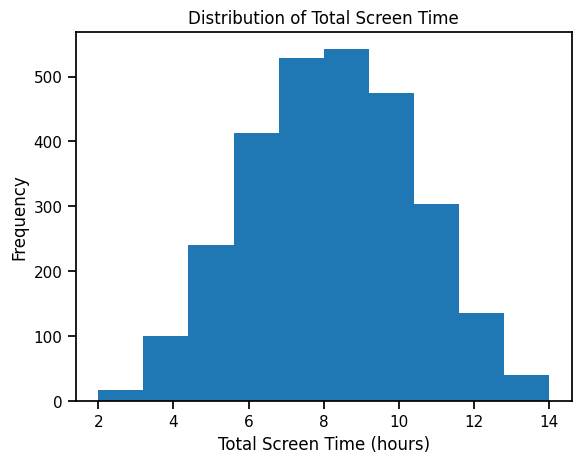

In [81]:
# Histogram of total screen time
plt.figure()
plt.hist(df['total_screen_time'])
plt.xlabel("Total Screen Time (hours)")
plt.ylabel("Frequency")
plt.title("Distribution of Total Screen Time")
plt.show()



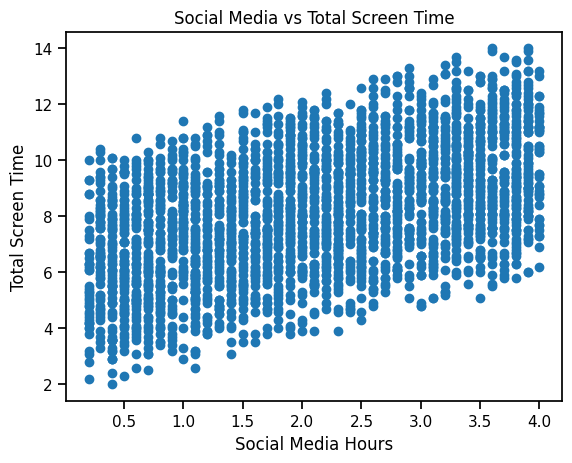

In [82]:

# Scatter plot: Social media vs Total screen time
plt.figure()
plt.scatter(df['social_media_hours'], df['total_screen_time'])
plt.xlabel("Social Media Hours")
plt.ylabel("Total Screen Time")
plt.title("Social Media vs Total Screen Time")
plt.show()



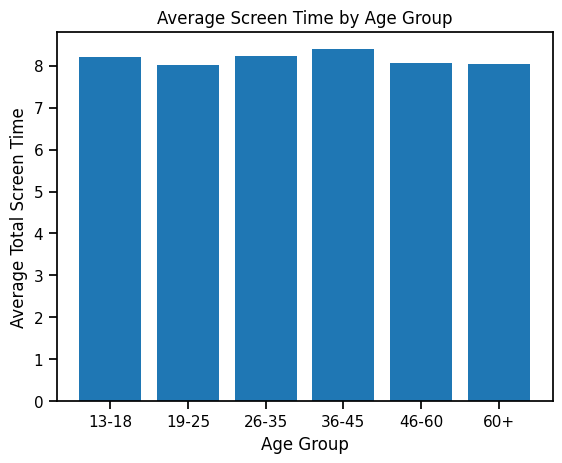

In [83]:
# Bar chart: Average screen time by age group
avg_by_age = df.groupby('age_group')['total_screen_time'].mean()

plt.figure()
plt.bar(avg_by_age.index, avg_by_age.values)
plt.xlabel("Age Group")
plt.ylabel("Average Total Screen Time")
plt.title("Average Screen Time by Age Group")
plt.show()

Boxplot (Outliers & Spread)

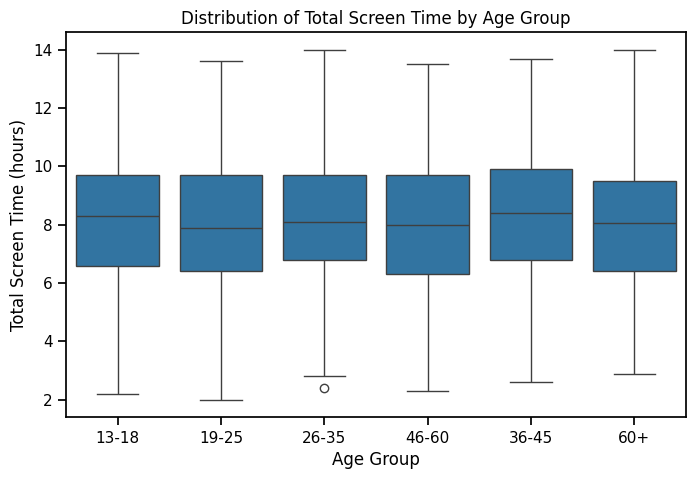

In [84]:
plt.figure(figsize=(8,5))
sns.boxplot(x='age_group', y='total_screen_time', data=df)
plt.xlabel("Age Group")
plt.ylabel("Total Screen Time (hours)")
plt.title("Distribution of Total Screen Time by Age Group")
plt.show()


Correlation Heatmap

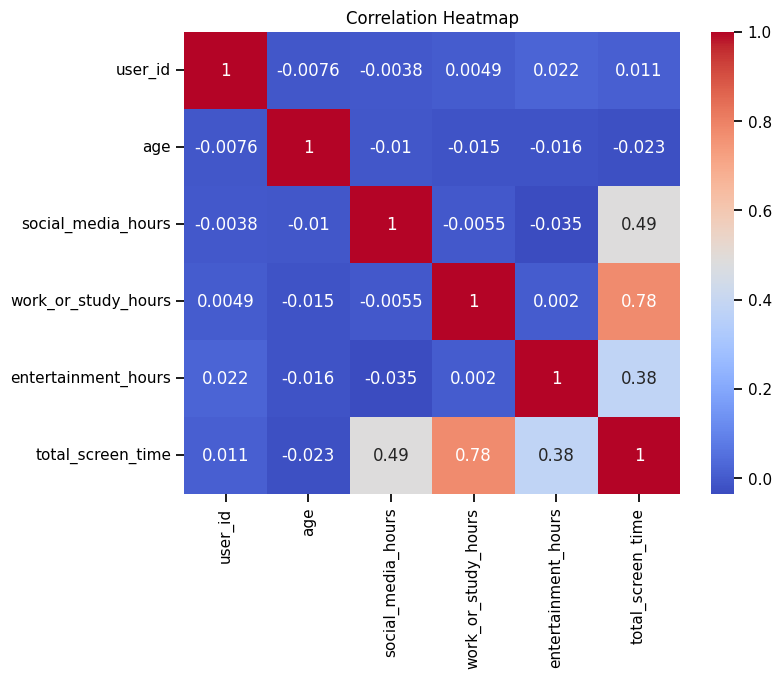

In [85]:
numeric_cols = df.select_dtypes(include='number')
corr = numeric_cols.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Pairplot (Multiple Relationships at once)

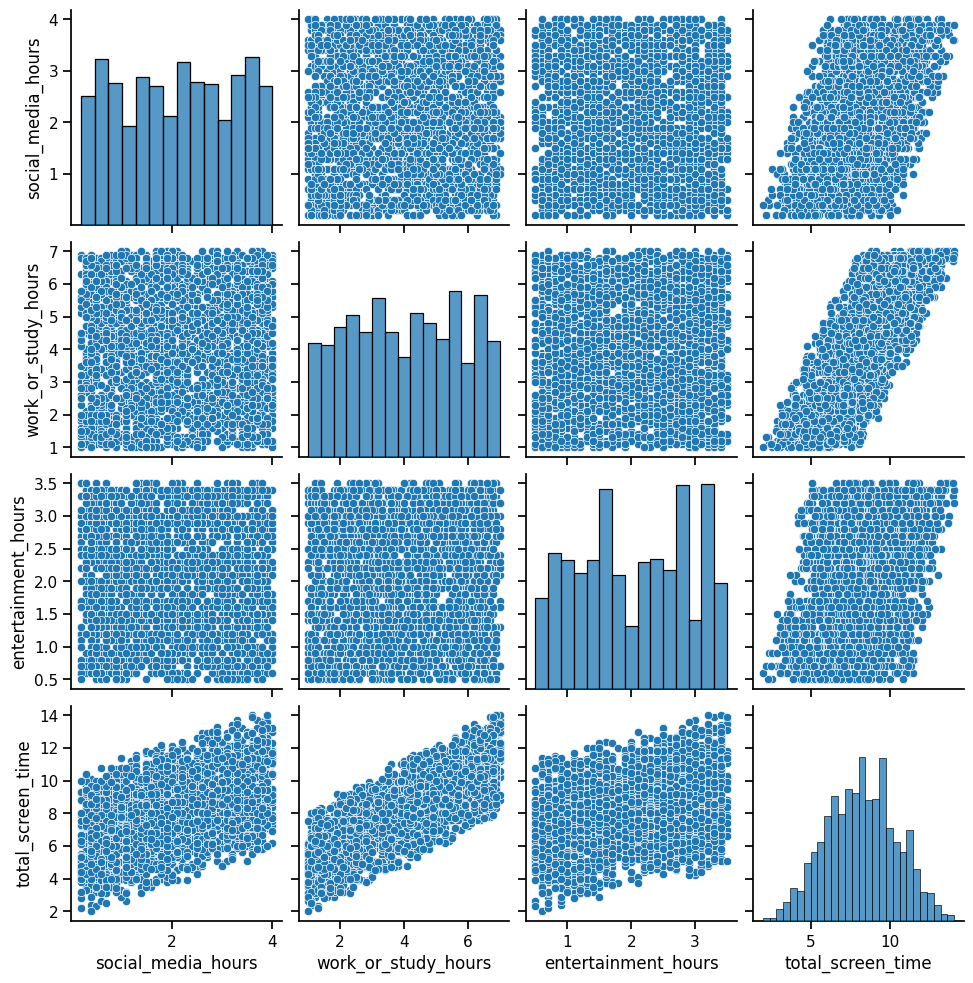

In [86]:
sns.pairplot(df[['social_media_hours', 'work_or_study_hours', 
                 'entertainment_hours', 'total_screen_time']])
plt.show()

